Weather evaluation based on measuered values for days 21-27:  [False False False False  True  True  True]
Prediction for the testing days (21-27):                      [False  True False False  True  True  True]


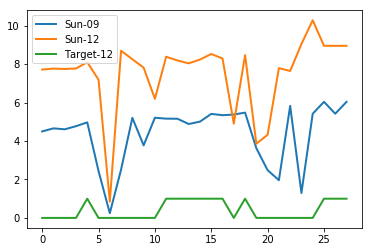

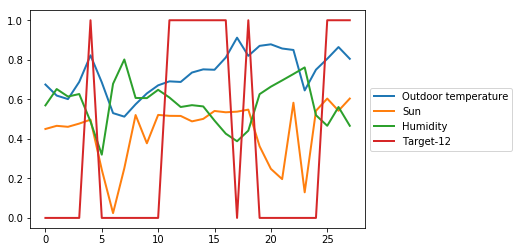

LDA prediction match: 6 out of 7 days.
*************************************************************************************************
Hourly regression based on weather values from 6am to 9am


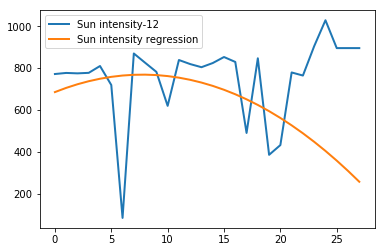

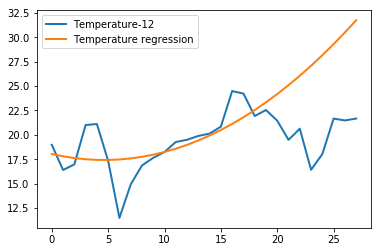

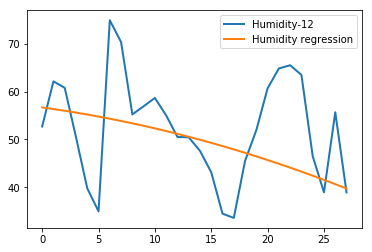

Daily regression
Day 21 Real/Pred:  False False --- sun: 779.072 / 526.679626165  temp: 19.4907 / 25.0919532331  humid: 64.8213 / 44.8974784962
Day 22 Real/Pred:  False False --- sun: 764.352 / 488.722545769  temp: 20.636 / 26.0572581408  humid: 65.4853 / 44.0908165277
Day 23 Real/Pred:  False False --- sun: 904.661 / 448.001754463  temp: 16.4213 / 27.0798025831  humid: 63.472 / 43.2618141508
Day 24 Real/Pred:  False False --- sun: 1028.27 / 404.517252247  temp: 18.0387 / 28.1595865601  humid: 46.4827 / 42.4104713656
Day 25 Real/Pred:  True False --- sun: 895.275 / 358.269039122  temp: 21.6733 / 29.2966100716  humid: 38.924 / 41.536788172
Day 26 Real/Pred:  True False --- sun: 895.317 / 309.257115086  temp: 21.4787 / 30.4908731178  humid: 55.6587 / 40.6407645701
Day 27 Real/Pred:  True False --- sun: 895.275 / 257.481480141  temp: 21.6733 / 31.7423756985  humid: 38.924 / 39.7224005599
Daily regression matched prognosis: 4 out of 7 days.
*************************************************

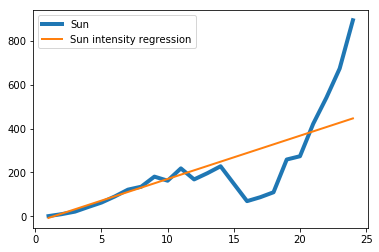

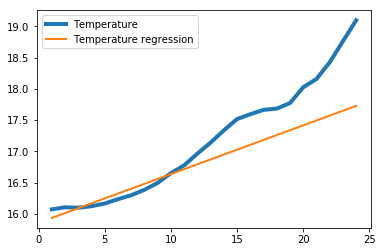

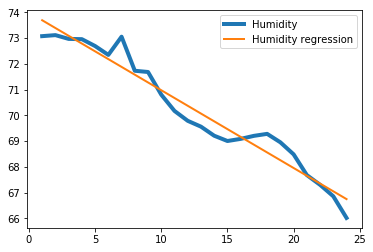

Day 21 Real/Pred:  False False --- sun: 779.072 / 387.148122763  temp: 19.4907 / 17.4933941725  humid: 64.8213 / 67.6553723776
---------------------------------------------------------
Day: 22


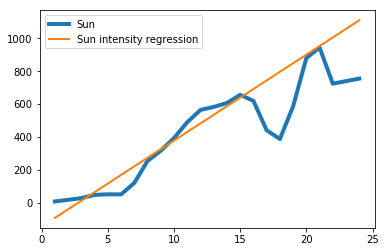

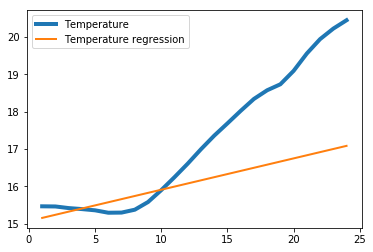

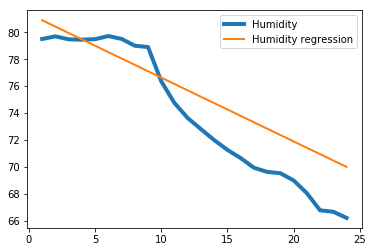

Day 22 Real/Pred:  False False --- sun: 764.352 / 1006.1725986  temp: 20.636 / 16.915022028  humid: 65.4853 / 70.9426993007
---------------------------------------------------------
Day: 23


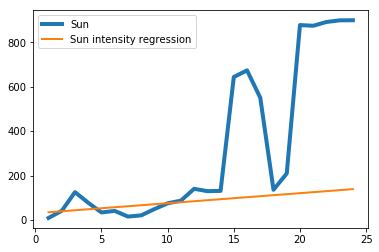

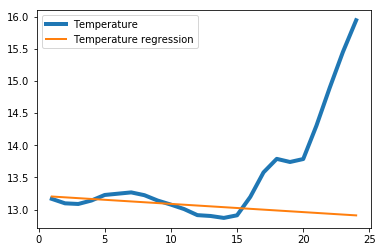

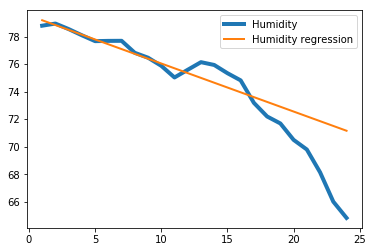

Day 23 Real/Pred:  False False --- sun: 904.661 / 134.119578077  temp: 16.4213 / 12.9221051282  humid: 63.472 / 71.5045051282
---------------------------------------------------------
Day: 24


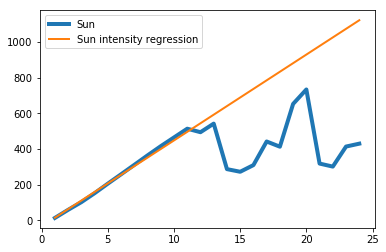

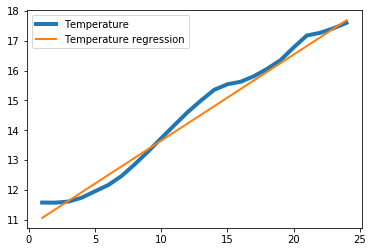

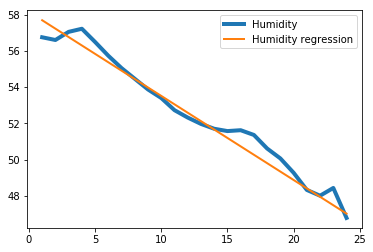

Day 24 Real/Pred:  False False --- sun: 1028.27 / 1121.84284207  temp: 18.0387 / 17.6930786713  humid: 46.4827 / 47.0311483683
---------------------------------------------------------
Day: 25


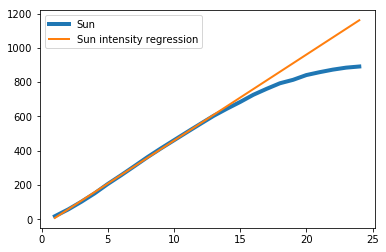

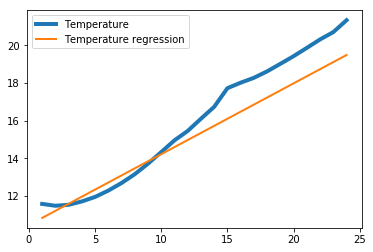

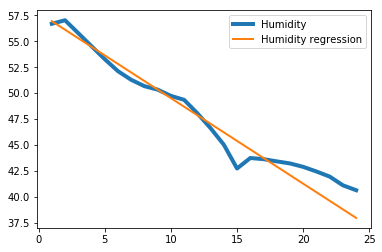

Day 25 Real/Pred:  True True --- sun: 895.275 / 1211.21556445  temp: 21.6733 / 19.8558885781  humid: 38.924 / 37.1234705128
---------------------------------------------------------
Day: 26


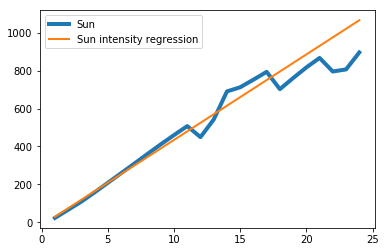

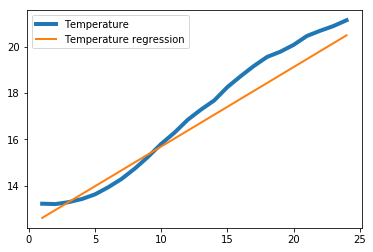

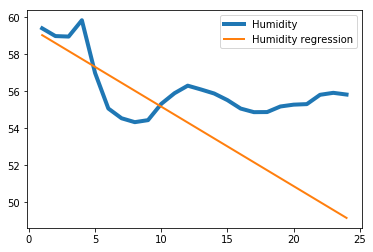

Day 26 Real/Pred:  True True --- sun: 895.317 / 1156.02770455  temp: 21.4787 / 21.1918848485  humid: 55.6587 / 48.2954045455
---------------------------------------------------------
Day: 27


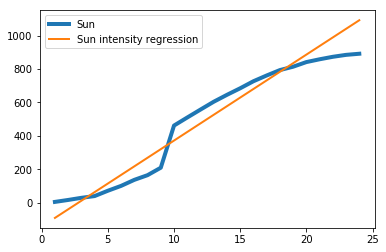

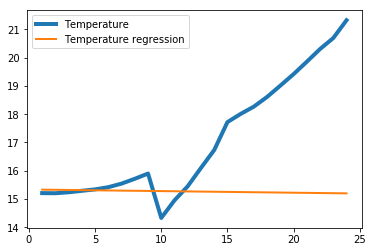

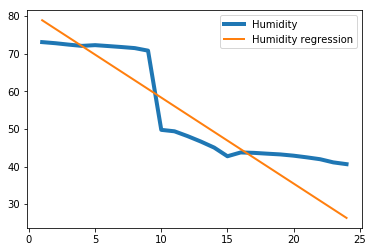

Day 27 Real/Pred:  True False --- sun: 895.275 / 1246.317512  temp: 21.6733 / 15.1815189977  humid: 38.924 / 19.495097669
Hourly regression matched prognosis: 6 out of 7 days.
*************************************************************************************************


In [1]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Data loading
data = sp.genfromtxt("F:\\Singidunum\\Godina 4\\Semestar 1\\Masinsko ucenje\\Projektni rad\\Datasets\\DATA.csv", delimiter=",", dtype=str)

#Data preparation
temp12=data[98::96,21].astype(np.float)
tempRoom12=data[98::96,2].astype(np.float)
tempDining12=data[98::96,3].astype(np.float)
tempForecast12=data[98::96,4].astype(np.float)
co2_12=data[98::96,6].astype(np.float)
rain12=data[98::96,11].astype(np.float)
sun12=data[98::96,17].astype(np.float)
sunEast12=data[98::96,15].astype(np.float)
sunSouth12=data[98::96,16].astype(np.float)
precipitaion12=data[98::96,12].astype(np.float)
wind12=data[98::96,13].astype(np.float)
humid12=data[98::96,22].astype(np.float)

temp09=data[86::96,21].astype(np.float)
tempRoom09=data[86::96,2].astype(np.float)
tempDining09=data[86::96,3].astype(np.float)
tempForecast09=data[86::96,4].astype(np.float)
co2_09=data[86::96,6].astype(np.float)
rain09=data[86::96,11].astype(np.float)
sun09=data[86::96,17].astype(np.float)
sunEast09=data[86::96,15].astype(np.float)
sunSouth09=data[86::96,16].astype(np.float)
precipitaion09=data[86::96,12].astype(np.float)
wind09=data[86::96,13].astype(np.float)
humid09=data[86::96,22].astype(np.float)

trainingDays=20+1

features09=np.vstack([temp09,sun09,sunEast09,humid09]).T
features12=np.vstack([temp12,sun12,sunSouth12,humid12]).T
target12=(sun12>800) & (temp12>19) & (humid12<60)

t=np.arange(1,2764).astype(np.float)
tDaily=np.arange(0,28).astype(np.float)

#Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(features09[:trainingDays], target12[:trainingDays])
ldaPredict = lda.predict(features09[trainingDays:]) 
print("Weather evaluation based on measuered values for days 21-27: ", target12[trainingDays:])
print("Prediction for the testing days (21-27):                     ", ldaPredict)


plt.plot(tDaily, sun09/100, linewidth=2, label='Sun-09')
plt.plot(tDaily, sun12/100, linewidth=2, label='Sun-12')
plt.plot(tDaily, target12, linewidth=2, label='Target-12')
plt.legend()
plt.show()

plt.plot(tDaily, temp09/20, linewidth=2, label='Outdoor temperature')
plt.plot(tDaily, sun09/1000, linewidth=2, label='Sun')
plt.plot(tDaily, humid09/100, linewidth=2, label='Humidity')
plt.plot(tDaily, target12, linewidth=2, label='Target-12')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

ldaTartget=target12[trainingDays:]
ldaPredictionMatch=np.sum(ldaTartget == ldaPredict)
print("LDA prediction match:", ldaPredictionMatch, "out of", len(tDaily)-trainingDays,"days.")
print("*************************************************************************************************")

#Regression based on daily measurements
print("=================================================================================================")
print("Hourly regression based on weather values from 6am to 9am")
order=2

pf = sp.polyfit(tDaily[:trainingDays], sun12[:trainingDays], order)
fsun = sp.poly1d(pf)
plt.plot(tDaily, sun12, linewidth=2, label='Sun intensity-12')
plt.plot(tDaily, fsun(tDaily), linewidth=2, label='Sun intensity regression')
plt.legend()
plt.show()

pf = sp.polyfit(tDaily[:trainingDays], temp12[:trainingDays], order)
ftemp = sp.poly1d(pf)
plt.plot(tDaily, temp12, linewidth=2, label='Temperature-12')
plt.plot(tDaily, ftemp(tDaily), linewidth=2, label='Temperature regression')
plt.legend()
plt.show()

pf = sp.polyfit(tDaily[:trainingDays], humid12[:trainingDays], order)
fhumid = sp.poly1d(pf)
plt.plot(tDaily, humid12, linewidth=2, label='Humidity-12')
plt.plot(tDaily, fhumid(tDaily), linewidth=2, label='Humidity regression')
plt.legend()
plt.show()

regressionTarget=np.arange(0,28).astype(np.bool)
print("Daily regression")
for x in range(trainingDays,28):
    regressionTarget[x]=(fsun(x)>800) & (ftemp(x)>19) & (fhumid(x)<60)
    print("Day",x,"Real/Pred: ",target12[x],regressionTarget[x],"--- sun:",sun12[x],"/",fsun(x)," temp:",temp12[x],"/",ftemp(x)," humid:",humid12[x],"/",fhumid(x))
        
dailyRegressionMatch=np.sum(target12[trainingDays:28] == regressionTarget[trainingDays:28])        
print("Daily regression matched prognosis:", dailyRegressionMatch, "out of", len(tDaily)-trainingDays,"days.")
print("*************************************************************************************************")

#Regression based on hourly measurements
order=1
tHourly=np.arange(1,13).astype(np.float)
tHourlyPrediction=np.arange(1,25).astype(np.float)
print("=================================================================================================")
print("Hourly regression based on weather values from 6am to 9am")
for x in range(trainingDays,28):
    sunH=data[74+x*96:86+x*96:1,17].astype(np.float)
    tempH=data[74+x*96:86+x*96:1,21].astype(np.float)
    humidH=data[74+x*96:86+x*96:1,22].astype(np.float)
    
    sunA=data[74+x*96:98+x*96:1,17].astype(np.float)
    tempA=data[74+x*96:98+x*96:1,21].astype(np.float)
    humidA=data[74+x*96:98+x*96:1,22].astype(np.float)

    print("---------------------------------------------------------")
    print("Day:",x)
    pf = sp.polyfit(tHourly, sunH, order)
    fsun = sp.poly1d(pf)
    plt.plot(tHourlyPrediction, sunA, linewidth=4, label='Sun')
    plt.plot(tHourlyPrediction, fsun(tHourlyPrediction), linewidth=2, label='Sun intensity regression')
    plt.legend()
    plt.show()

    pf = sp.polyfit(tHourly, tempH, order)
    ftemp = sp.poly1d(pf)
    plt.plot(tHourlyPrediction, tempA, linewidth=4, label='Temperature')
    plt.plot(tHourlyPrediction, ftemp(tHourlyPrediction), linewidth=2, label='Temperature regression')
    plt.legend()
    plt.show()

    pf = sp.polyfit(tHourly, humidH, order)
    fhumid = sp.poly1d(pf)
    plt.plot(tHourlyPrediction, humidA, linewidth=4, label='Humidity')
    plt.plot(tHourlyPrediction, fhumid(tHourlyPrediction), linewidth=2, label='Humidity regression')
    plt.legend()
    plt.show()
    
    regressionTarget[x]=(fsun(x)>800) & (ftemp(x)>19) & (fhumid(x)<60)
    print("Day",x,"Real/Pred: ",target12[x],regressionTarget[x],"--- sun:",sun12[x],"/",fsun(x)," temp:",temp12[x],"/",ftemp(x)," humid:",humid12[x],"/",fhumid(x))
        
hourlyRegressionMatch=np.sum(target12[trainingDays:28] == regressionTarget[trainingDays:28])        
print("Hourly regression matched prognosis:", hourlyRegressionMatch, "out of", len(tDaily)-trainingDays,"days.")
print("*************************************************************************************************")

Correlation between Sun radiation intensity at 9am and 12pm:  0.518119881099


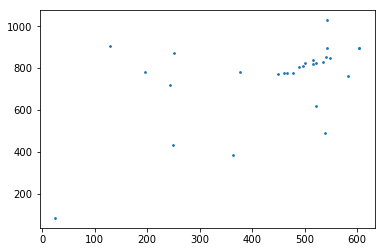

In [89]:
print("Correlation between Sun radiation intensity at 9am and 12pm: ", np.corrcoef(sun09, sun12)[0, 1])
plt.scatter(sun09,sun12,s=3)
plt.show()

Correlation between Sun radiation flux at 9am (east) and 12pm (south):  0.546192021921


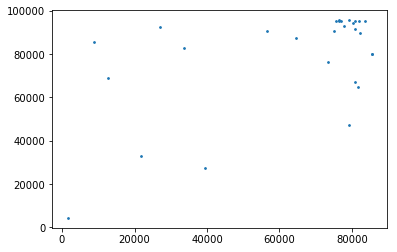

In [88]:
print("Correlation between Sun radiation flux at 9am (east) and 12pm (south): ", np.corrcoef(sunEast09, sunSouth12)[0, 1])
plt.scatter(sunEast09,sunSouth12,s=3)
plt.show()

Correlation between temperature at 9am and 12pm:  0.868151400143


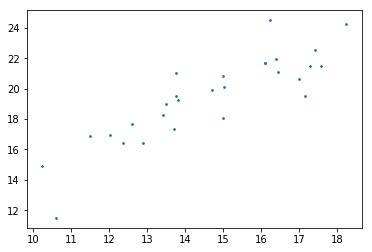

In [87]:
print("Correlation between temperature at 9am and 12pm: ", np.corrcoef(temp09, temp12)[0, 1])
plt.scatter(temp09,temp12,s=3)
plt.show()

Correlation between wind velocity at 9am and 12pm:  0.163527173604


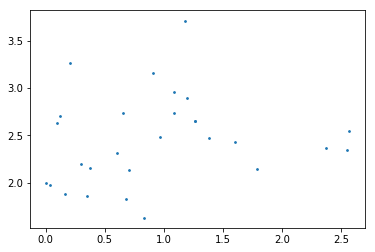

In [90]:
print("Correlation between wind velocity at 9am and 12pm: ", np.corrcoef(wind09, wind12)[0, 1])
plt.scatter(wind09,wind12,s=3)
plt.show()

Correlation between humidity at 9am and 12pm:  0.922796817008


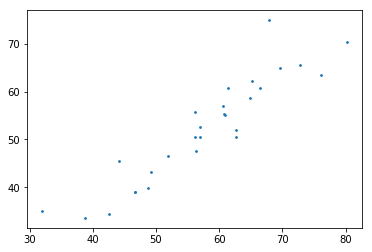

In [91]:
print("Correlation between humidity at 9am and 12pm: ", np.corrcoef(humid09, humid12)[0, 1])
plt.scatter(humid09,humid12,s=3)
plt.show()